<a href="https://colab.research.google.com/github/jpsiegel/Projects/blob/master/Jan_SIEGEL_MOLLER_Predator_Prey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ayudantia 1

Ayudantia exercise from 14:00 to 23:59
The assistants will help you from 15:30 to 17:00
You can contact the assistants using zoom conference.
Alternatively you can mail the assistants at gsvidal@uc.cl and g

1. Find equilibrium points of the discrete Lotka-Voltera
model, state them clearly (1 point)

2. Compute stability of one equilibrium point, demostrate it with a plot (2 points)

3. Make phase plots of the system (2 points)

4. Extend predator prey model with 3rd species
(predator or prey), simulate and plot results (1 point)

Note: use code/predator-prey.py that is below

Remember that the ayudantia will be recorded.

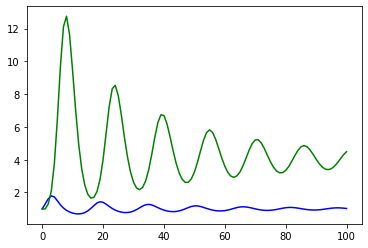

In [25]:
from pylab import *

def initialize():
    global x, y, xresult, yresult
    x = 1.
    y = 1.
    xresult = [x]
    yresult = [y]

def observe():
    global x, y, xresult, yresult
    xresult.append(x)
    yresult.append(y)

def update():
    global x, y, xresult, yresult
    r = 1.
    b = 1.
    d = 1.
    c = 1.
    K = 5.
    nextx = x + r * x * (1 - x / K) - (1 - 1 / (b * y + 1)) * x 
    nexty = y - d * y + c * x * y
    x, y = nextx, nexty

initialize()
for t in range(100):
    update()
    observe()

#plot([i for i in range(101)], xresult, 'b-')
#plot([i for i in range(101)], yresult, 'g-')
plot(xresult, 'b-')
plot(yresult, 'g-')
show()

**1.** Buscamos que X_t+1 = X_t y que Y_t+1 = Y_t para encontrar puntos de equilibrio

In [0]:
x = x + r * x * (1 - x / K) - (1 - 1 / (b * y + 1)) * x 
y = y - d * y + c * x * y


Al resolver el sistema de ecuaciones, tenemos que:

{ x = 0 ; y = 0 } ó { x = k ; y = 0 } ó bien { x = d/c ; y = (1/b) * [ 1/( r(d/ck - 1) + 1 ) - 1 ] }

Luego, reemplazando los valores dados, tenemos que { x = 1 ; y = 4 } para el caso mas interesante, que estudiaremos a continuacion


Para calcular la estabilidad del sistema, tenemos que:
```
F1 = x + r * x * (1 - x / K) - (1 - 1 / (b * y + 1)) * x 
F2 = y - d * y + c * x * y
```
Construimos el jacobiano
```
J = [ dF1/dx   dF1/dy ]
    [ dF2/dx   dF2/dy ]
```

Con las derivadas y reemplazando los parametros y el punto (1,4):
```
dF1/dx = r - (2*r*x)/K + 1/(1+b*y) = 1 - (2*1*1)/5 + 1/(1+1*4) = 4/5

dF1/dy = -(b*x) / (1 + b*y)^2 = -(1*1) / (1+1*4)^2 = -1/25

dF2/dx = c*y = 4

dF2/dy = 1 - d + c*x = 1
```
Luego,
```
J = [ 4/5  -1/25 ]
    [  4      1   ]
```
Finalmente obtenemos los eigenvalues:
```
λ_1 = 1/10 (9 + i*sqrt(15))
λ_2 = 1/10 (9 - i*sqrt(15))
```
Esto nos indica que el eigenvalue dominante es un complejo menor a 1, por lo que, segun el diagrama, el sistema es una espiral estable decreciente, dado que oscila decrecientemente hasta converger al punto de equilibrio. Así lo podemos observar en el siguiente gráfico de fase

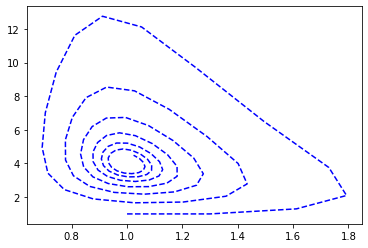

In [32]:
clf() #clear plot

initialize()
for t in range(100):
    update()
    observe()

plot(xresult, yresult, 'b--')
show()

Si alargamos la simulación (de 100 a 200 iteraciones, o unidades temporales) vemos que claramente converge al punto de equilibrio calculado anteriormente

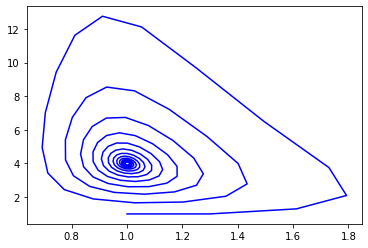

In [33]:
clf() #clear plot

initialize()
for t in range(200):
    update()
    observe()

plot(xresult, yresult, 'b-')
show()

Finalmente, editamos el modelo para agregar otro depredador

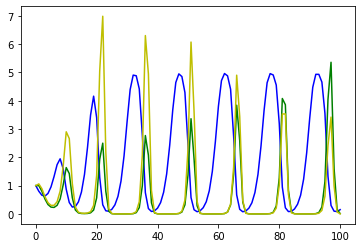

In [89]:
clf()
def initialize():
    global x, y, z, xresult, yresult, zresult
    x = 1.
    y = 1.
    z = 1.
    xresult = [x]
    yresult = [y]
    zresult = [z]

def observe():
    global x, y, z, xresult, yresult, zresult
    xresult.append(x)
    yresult.append(y)
    zresult.append(z)

def update():
    global x, y, z, xresult, yresult, zresult
    r = 1
    b = 1
    bz = 1
    d = 1
    c = 1
    dz = 1.04
    cz = 1.1
    K = 5
    nextx = x + r * x * (1 - x / K) - (1 - 1 / (b * y + 1)) * x - (1 - 1 / (bz * z + 1)) * x
    nexty = y - d * y + c * x * y
    nextz = z - dz * z + cz * x * z
    x, y, z = nextx, nexty, nextz

initialize()
for t in range(100):
    update()
    observe()

plot(xresult, 'b-')
plot(yresult, 'g-')
plot(zresult, 'y-')
show()

Este depredador nuevo (en amarillo) caza/se reproduce más rápido, pero muere de hambre también mas rápido. Según este modelo, estas características le darían una mayor ventaja al principio, pero eventualmente la especie y (verde) sobrevivirá mejor los tiempos de hambruna, por lo que superará la ventaja cazadora de la especie z.